# An introduction to seaborn

Seaborn은 Python으로 통계 그래픽을 만들기 위한 라이브러리입니다. matplotlib을 기반으로 구축되었으며 pandas 데이터 구조와 긴밀하게 통합됩니다.

Seaborn은 데이터를 탐색하고 이해하는 데 도움을 줍니다. 플로팅 함수는 전체 데이터 세트를 포함하는 데이터 프레임과 배열에서 작동하며, 내부적으로 필요한 시맨틱 매핑과 통계 집계를 수행하여 유익한 플롯을 생성합니다. 데이터 집합 중심의 선언적 API를 사용하면 플롯을 그리는 방법에 대한 세부 사항보다는 플롯의 다양한 요소가 무엇을 의미하는지에 집중할 수 있습니다.

다음은 seaborn으로 할 수 있는 일의 예입니다.

In [1]:
# ! pip install seaborn

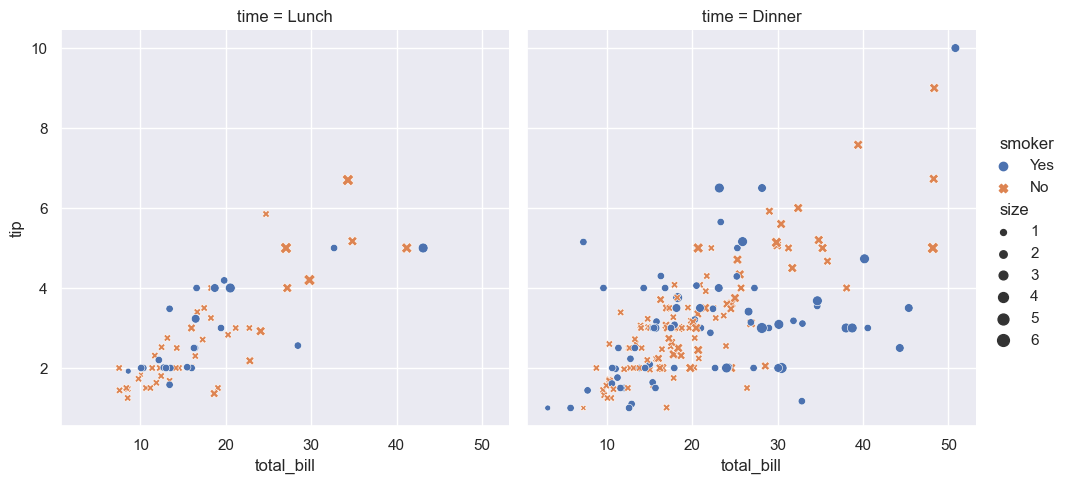

In [2]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

여기서 몇 가지 일이 일어났습니다. 하나씩 살펴봅시다:

In [3]:
# Import seaborn
import seaborn as sns

이 간단한 예제에서 가져와야 하는 유일한 라이브러리는 Seaborn입니다. 관례에 따라 약어 SNS를 사용하여 가져옵니다.

이면에서 seaborn은 matplotlib를 사용하여 플롯을 그립니다. 대화형 작업의 경우, 플롯을 보려면 matplotlib 모드에서 Jupyter/IPython 인터페이스를 사용하는 것이 좋으며, 그렇지 않으면 matplotlib.pyplot.show()를 호출해야 합니다.

In [4]:
# Apply the default theme
sns.set_theme()

이것은 matplotlib rcParam 시스템을 사용하며, 씨본으로 만들지 않더라도 모든 matplotlib 플롯의 모양에 영향을 미칩니다. 기본 테마 외에도 몇 가지 다른 옵션이 있으며, 플롯의 스타일과 크기를 독립적으로 제어하여 프레젠테이션 컨텍스트 간에 작업을 빠르게 변환할 수 있습니다(예: 강연 중에 투사할 때 가독성 있는 글꼴이 있는 그림 버전을 만드는 것). matplotlib 기본값이 마음에 들거나 다른 테마를 선호하는 경우, 이 단계를 건너뛰고 시본 플롯 기능을 계속 사용할 수 있습니다.

In [5]:
# Load an example dataset
tips = sns.load_dataset("tips")

문서에 있는 대부분의 코드는 load_dataset() 함수를 사용하여 예제 데이터 세트에 빠르게 액세스할 수 있습니다. 이 데이터 세트에는 특별한 것이 없습니다. 이 데이터 세트는 pandas 데이터 프레임일 뿐이며, pandas.read_csv()로 로드하거나 직접 작성할 수도 있습니다. 문서에 있는 대부분의 예제에서는 판다 데이터 프레임을 사용하여 데이터를 지정하지만, seaborn은 허용하는 데이터 구조에 대해 매우 유연합니다.

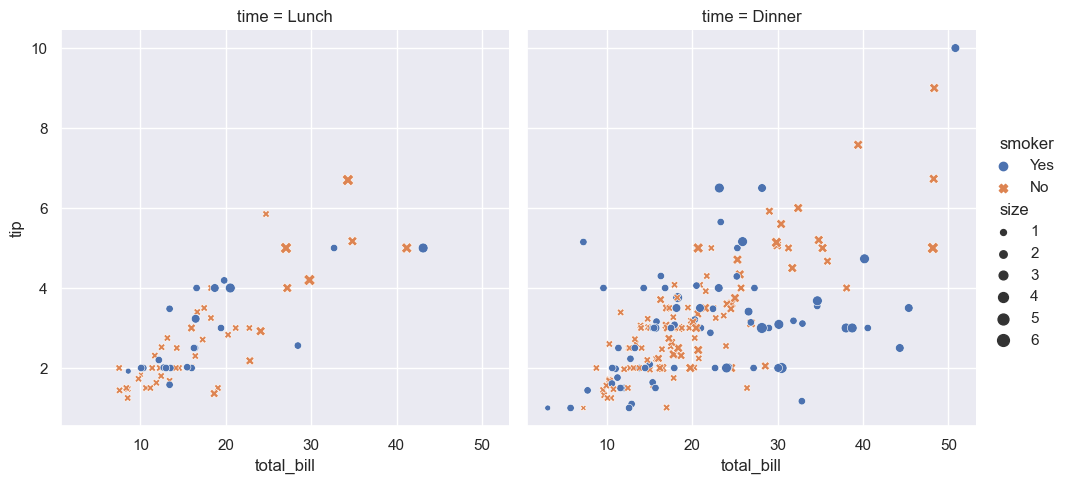

In [6]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

이 플롯은 seaborn 함수 relplot()을 한 번만 호출하여 팁 데이터 집합의 5개 변수 간의 관계를 보여줍니다. 플롯에서 변수의 이름과 그 역할만 제공한 것이 눈에 띕니다. matplotlib를 직접 사용할 때와 달리, 색상 값이나 마커 코드와 같은 플롯 요소의 속성을 지정할 필요가 없었습니다. 데이터프레임의 값에서 matplotlib이 이해할 수 있는 인수로 변환하는 작업은 seaborn이 처리했습니다. 이러한 선언적 접근 방식을 사용하면 matplotlib을 제어하는 방법에 대한 세부 사항보다는 답을 얻고자 하는 질문에 집중할 수 있습니다.

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# A high-level API for statistical graphics

데이터를 시각화하는 데 보편적으로 가장 좋은 방법은 없습니다. 각기 다른 질문에는 각기 다른 플롯으로 가장 잘 답할 수 있습니다. Seaborn을 사용하면 일관된 데이터 집합 지향 API를 사용하여 다양한 시각적 표현을 쉽게 전환할 수 있습니다.  

relplot() 함수는 다양한 통계적 관계를 시각화하도록 설계되었기 때문에 그렇게 명명되었습니다. 분산형 차트가 효과적인 경우가 많지만, 하나의 변수가 시간의 척도를 나타내는 관계는 선으로 표현하는 것이 더 효과적입니다. relplot() 함수에는 이 대체 표현으로 쉽게 전환할 수 있는 편리한 종류 매개변수가 있습니다.

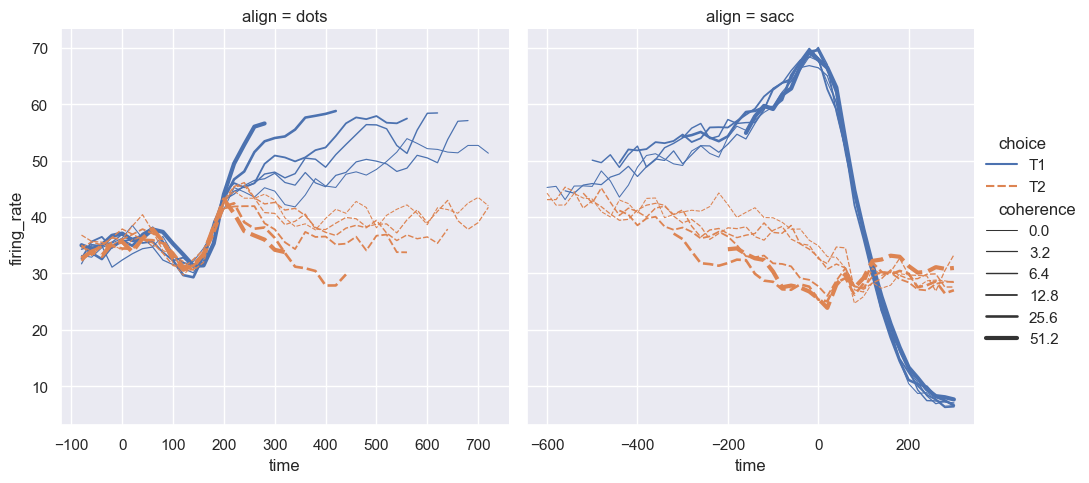

In [8]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

크기 및 스타일 매개 변수가 분산형 차트와 꺾은선형 차트 모두에 사용되지만, 분산형 차트에서 마커 영역과 기호를 변경하고 꺾은선형 차트에서 선 너비와 대시를 변경하는 등 두 비주얼리제이션에 서로 다른 영향을 미친다는 점에 주목하세요. 이러한 세부 사항을 염두에 둘 필요가 없었기 때문에 플롯의 전체 구조와 전달하려는 정보에 집중할 수 있었습니다.

## Statistical estimation

종종 우리는 다른 변수의 함수로서 한 변수의 평균값에 관심이 있습니다. 많은 함수는 이러한 질문에 답하는 데 필요한 통계적 추정을 자동으로 수행합니다.

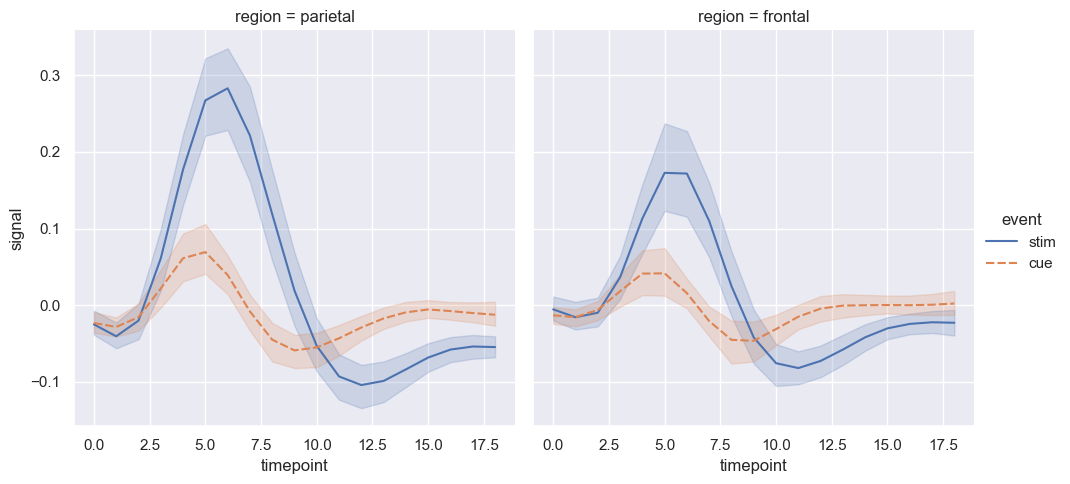

In [9]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

통계값을 추정할 때 씨본은 부트스트래핑을 사용하여 신뢰 구간을 계산하고 추정치의 불확실성을 나타내는 오차 막대를 그립니다.

씨본의 통계적 추정 기능은 설명적 통계를 뛰어넘습니다. 예를 들어, lmplot()을 사용하여 선형 회귀 모델(및 그 불확실성)을 포함함으로써 분산형 차트를 향상시킬 수 있습니다.

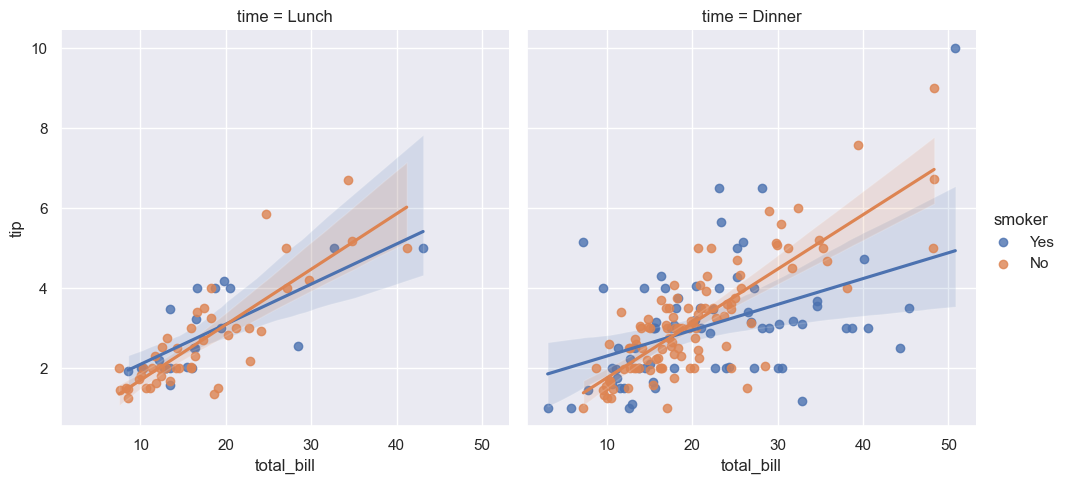

In [10]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Distributional representations

통계 분석을 하려면 데이터 집합의 변수 분포에 대한 지식이 필요합니다. seaborn 함수 displot()은 분포를 시각화하는 여러 가지 접근 방식을 지원합니다. 여기에는 히스토그램과 같은 고전적인 기법과 커널 밀도 추정과 같은 계산 집약적인 접근 방식이 포함됩니다.

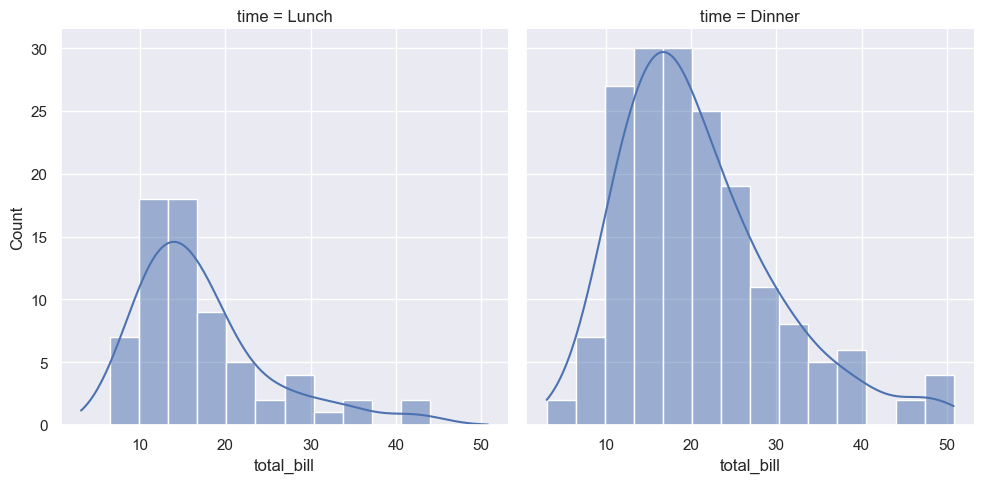

In [11]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn은 또한 데이터의 경험적 누적 분포 함수를 계산하고 플롯하는 등 강력하지만 익숙하지 않은 기법을 홍보하려고 노력합니다.

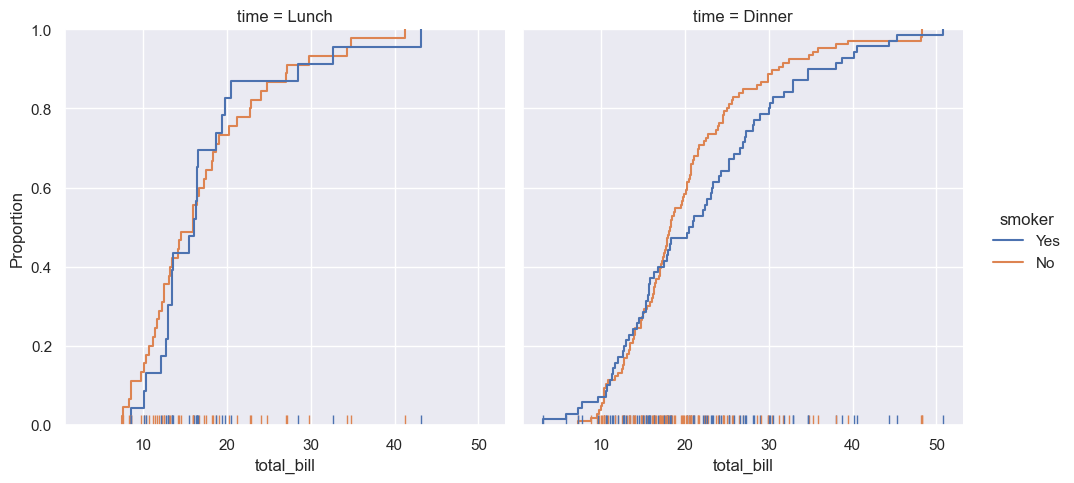

In [12]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## Plots for categorical data

seaborn의 몇 가지 특수 플롯 유형은 범주형 데이터를 시각화하는 데 중점을 두고 있습니다. 이러한 플롯은 catplot()을 통해 액세스할 수 있습니다. 이러한 플롯은 다양한 수준의 세분성을 제공합니다. 가장 세부적인 수준에서는 범주형 축을 따라 점의 위치를 겹치지 않도록 조정하는 분산형 차트인 '스웜' 플롯을 그려서 모든 관측값을 확인할 수 있습니다.

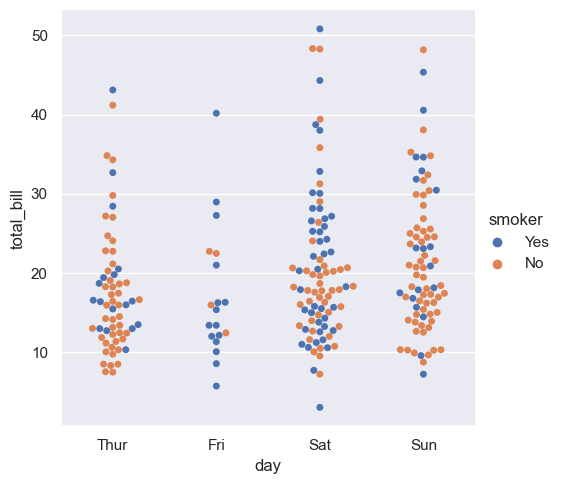

In [13]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

또는 커널 밀도 추정을 사용하여 포인트가 샘플링되는 기본 분포를 나타낼 수도 있습니다.

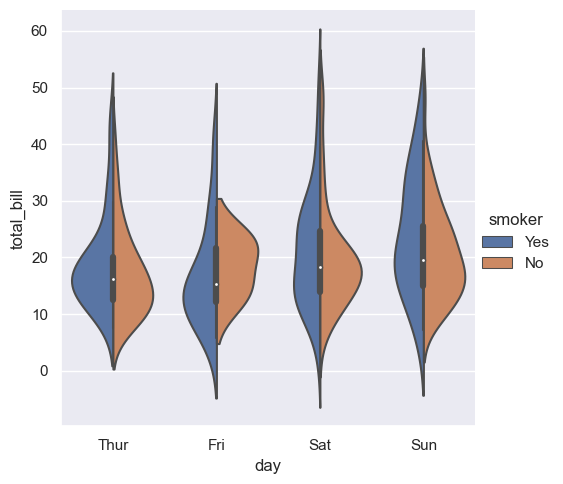

In [14]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

또는 중첩된 각 카테고리 내의 평균값과 신뢰 구간만 표시할 수도 있습니다.

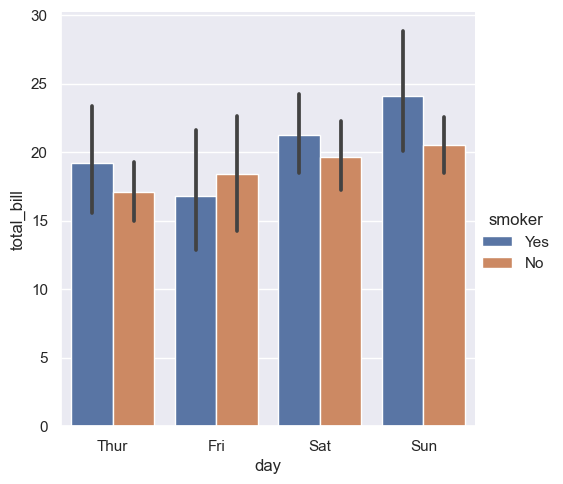

In [15]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

# Multivariate views on complex datasets

일부 함수는 여러 종류의 플롯을 결합하여 데이터 집합에 대한 유익한 요약을 신속하게 제공합니다. 그중 하나인 jointplot()은 단일 관계에 초점을 맞춥니다. 이 함수는 각 변수의 한계 분포와 함께 두 변수 간의 공동 분포를 플롯합니다.

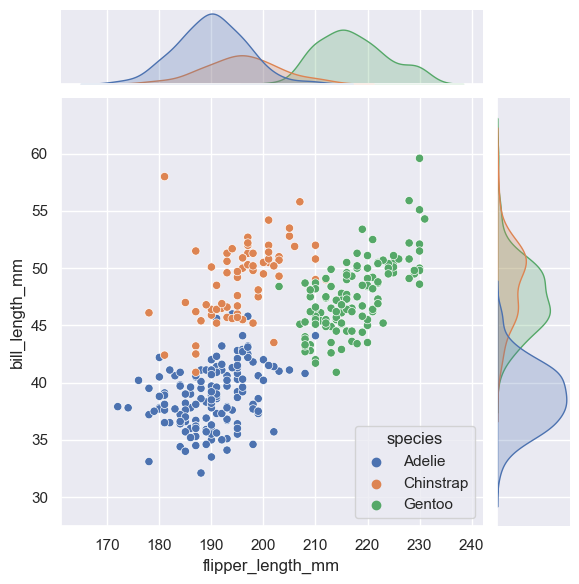

In [16]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

다른 하나인 pairplot()은 모든 쌍 관계와 각 변수에 대한 공동 분포와 한계 분포를 각각 표시하는 보다 광범위한 뷰를 제공합니다.

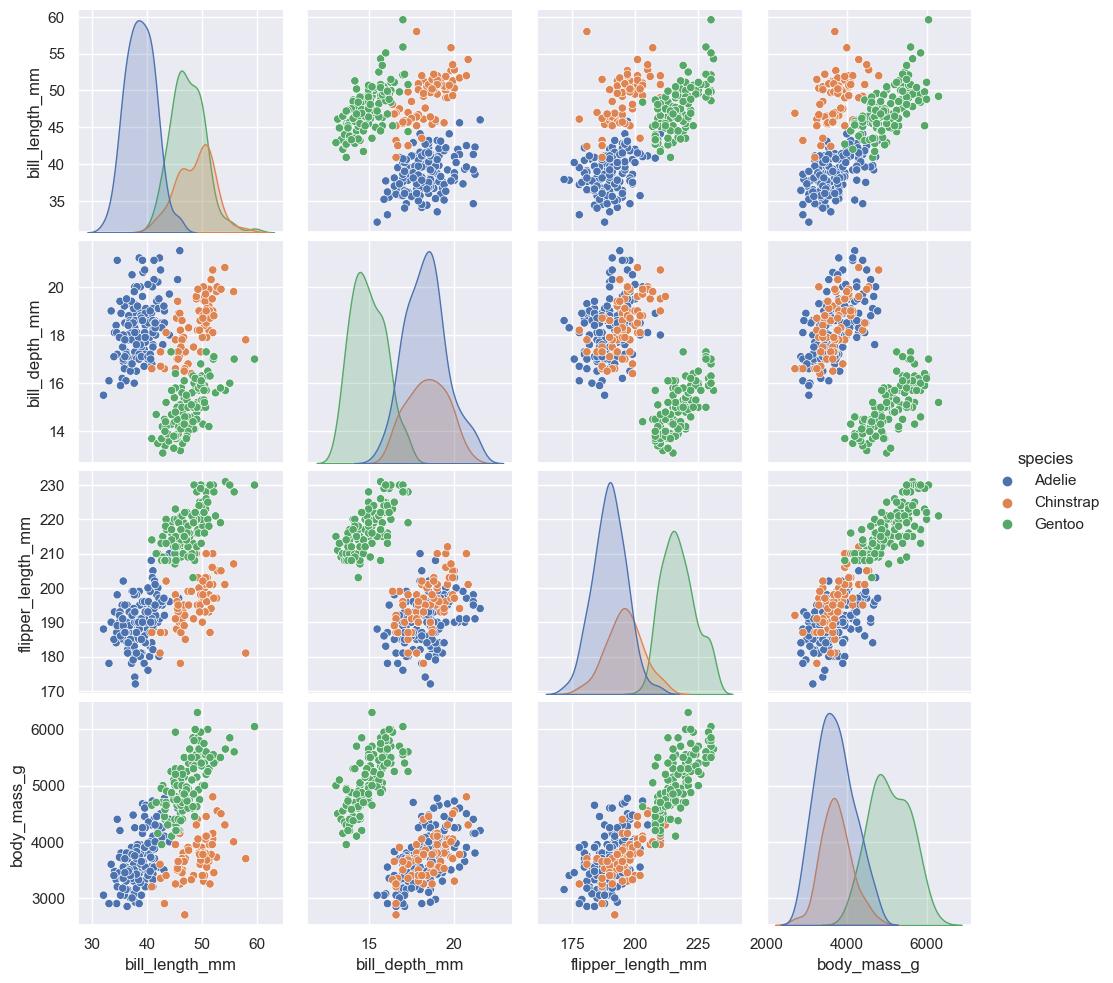

In [17]:
sns.pairplot(data=penguins, hue="species")

## Lower-level tools for building figures

이러한 도구는 축 수준 플로팅 함수와 그림의 레이아웃을 관리하는 객체를 결합하여 데이터 집합의 구조를 축 그리드에 연결하는 방식으로 작동합니다. 두 요소 모두 공개 API의 일부이며, 이를 직접 사용하여 몇 줄의 코드만 더 추가하면 복잡한 그림을 만들 수 있습니다.

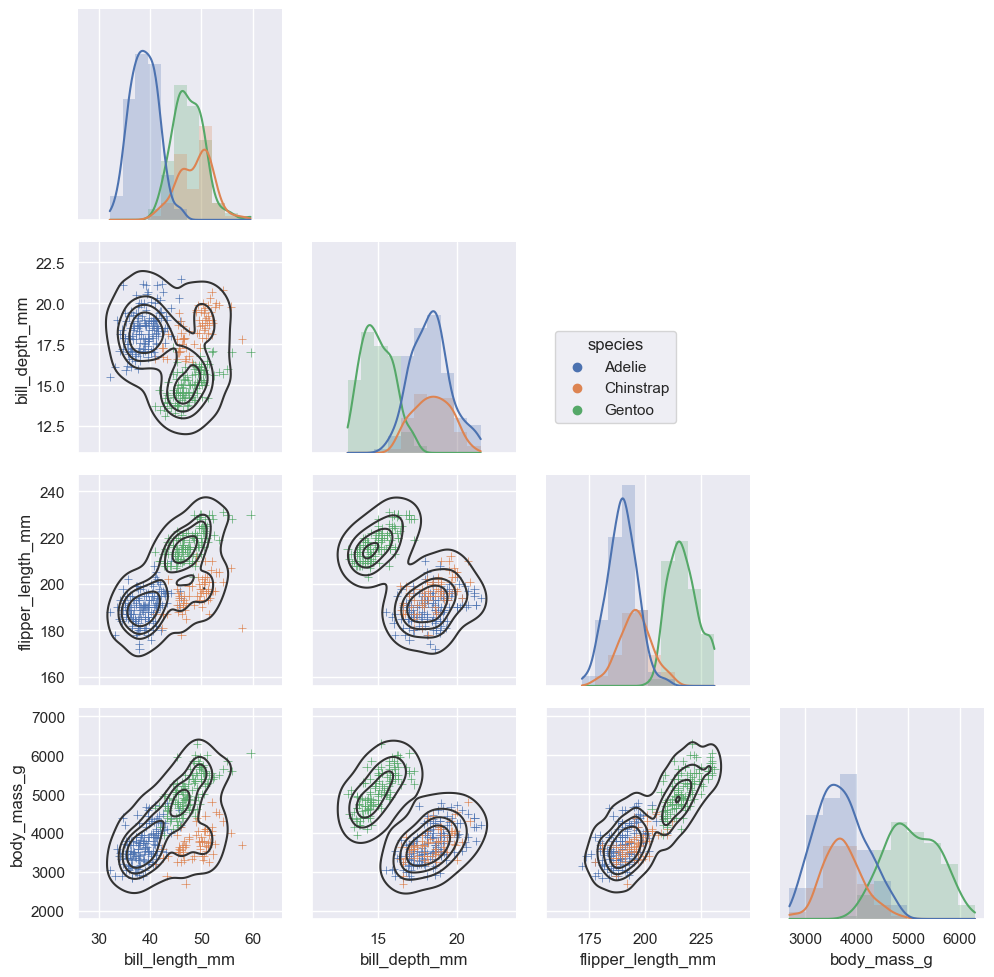

In [18]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# Opinionated defaults and flexible customization

Seaborn은 한 번의 함수 호출로 완전한 그래픽을 생성하며, 가능한 경우 함수가 플롯의 의미 매핑을 설명하는 정보성 축 레이블과 범례를 자동으로 추가합니다.

대부분의 경우, Seaborn은 데이터의 특성에 따라 매개변수의 기본값을 선택하기도 합니다. 예를 들어, 지금까지 살펴본 색상 매핑에서는 색조에 할당된 범주형 변수의 다양한 수준을 나타내기 위해 뚜렷한 색조(파란색, 주황색, 때로는 녹색)를 사용했습니다. 숫자 변수를 매핑할 때 일부 함수는 연속적인 그라데이션으로 전환됩니다.

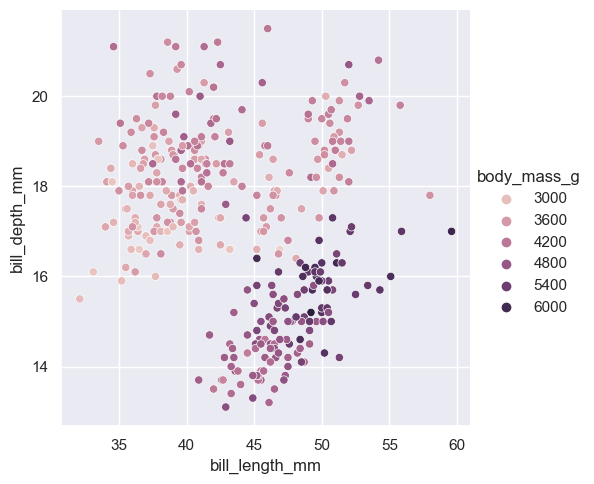

In [19]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

작품을 공유하거나 게시할 준비가 되면 기본값 이상으로 그림을 다듬고 싶을 것입니다. Seaborn은 여러 단계의 커스터마이징이 가능합니다. 모든 그림에 적용되는 여러 가지 기본 테마를 정의하고, 함수에 각 플롯의 의미 매핑을 수정할 수 있는 표준화된 매개 변수가 있으며, 추가 키워드 인수가 기본 matplotlib 아티스트에게 전달되어 더욱 많은 제어가 가능합니다. 플롯을 생성한 후에는 seaborn API를 통해 속성을 수정할 수 있으며, 세밀하게 조정하기 위해 matplotlib 레이어로 드롭다운하여 수정할 수도 있습니다.

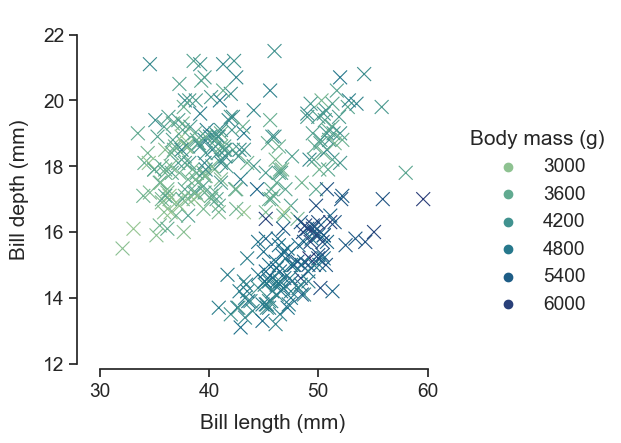

In [20]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

## Relationship to matplotlib

노트북에서의 탐색적 분석, GUI 애플리케이션에서의 실시간 상호 작용, 다양한 래스터 및 벡터 형식의 아카이브 출력 등 matplotlib가 지원하는 다양한 환경에서 Seaborn과 통합하여 사용할 수 있습니다.

기본 제공 함수만 사용해도 생산성을 높일 수 있지만, 그래픽을 완전히 사용자 정의하려면 matplotlib의 개념과 API에 대한 어느 정도의 지식이 필요합니다. seaborn을 처음 사용하는 사용자는 특정 커스터마이징을 달성하기 위해 matplotlib 레이어로 드롭다운해야 하는 시점을 파악하는 것이 학습 곡선의 한 측면이 될 수 있습니다. 반면에, matplotlib를 사용하던 사용자는 많은 지식이 이전된다는 것을 알게 될 것입니다.

Matplotlib에는 포괄적이고 강력한 API가 있으며, 그림의 거의 모든 속성을 원하는 대로 변경할 수 있습니다. seaborn의 높은 수준의 인터페이스와 matplotlib의 심층적인 사용자 지정 기능을 결합하면 데이터를 빠르게 탐색하고 출판물 수준의 최종 결과물에 맞게 조정할 수 있는 그래픽을 만들 수 있습니다.

## Next steps

다음 단계로 넘어갈 수 있는 몇 가지 옵션이 있습니다. 먼저 시본 설치 방법을 알아보는 것이 좋습니다. 설치가 완료되면 예제 갤러리를 탐색하여 seaborn으로 어떤 종류의 그래픽을 만들 수 있는지 폭넓게 파악할 수 있습니다. 또는 나머지 사용자 가이드와 튜토리얼을 읽고 다양한 도구와 각 도구의 용도에 대해 자세히 알아볼 수 있습니다. 특정 플롯을 염두에 두고 제작 방법을 알고 싶다면 각 함수의 매개변수를 문서화하고 사용법을 설명하는 다양한 예제를 보여주는 API 참조를 확인할 수 있습니다.